In [26]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
## modelling

from sklearn.metrics  import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings



In [27]:
df=pd.read_csv('data/stud.csv')

In [28]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
X= df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [30]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

In [31]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [32]:
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [33]:
X=preprocessor.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
## separate dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [36]:
X_train.shape,X_test.shape

((800, 19), (200, 19))

### Create an Evaluate function to give all metrics after model Training

In [37]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [44]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbours Regressor":KNeighborsRegressor(),
    "XGBRegressor":XGBRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random forest":RandomForestRegressor(),
    "Catboost":CatBoostRegressor(verbose=False),
    "AdaBoost":AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluation
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)  # ✅ Added this line to collect R2 scores

    print("Model performance for training set")
    print("Root mean squared error: {:.4f}".format(model_train_rmse))
    print("mean absolute error: {:.4f}".format(model_train_mae))
    print("R2 Score: {:.4f}".format(model_train_r2))

    print('-------------------------')

    print('Model performance for test set')
    print("Root mean squared error: {:.4f}".format(model_test_rmse))
    print("mean absolute error: {:.4f}".format(model_test_mae))
    print("R2 Score: {:.4f}".format(model_test_r2))


Linear Regression
Model performance for training set
Root mean squared error: 5.3243
mean absolute error: 4.2671
R2 Score: 0.8743
-------------------------
Model performance for test set
Root mean squared error: 5.3960
mean absolute error: 4.2158
R2 Score: 0.8803
Lasso
Model performance for training set
Root mean squared error: 6.5938
mean absolute error: 5.2063
R2 Score: 0.8071
-------------------------
Model performance for test set
Root mean squared error: 6.5197
mean absolute error: 5.1579
R2 Score: 0.8253
Ridge
Model performance for training set
Root mean squared error: 5.3233
mean absolute error: 4.2650
R2 Score: 0.8743
-------------------------
Model performance for test set
Root mean squared error: 5.3904
mean absolute error: 4.2111
R2 Score: 0.8806
K-Neighbours Regressor
Model performance for training set
Root mean squared error: 5.7077
mean absolute error: 4.5167
R2 Score: 0.8555
-------------------------
Model performance for test set
Root mean squared error: 7.2530
mean abs

In [45]:
print(model_list)
print(r2_list)

['Linear Regression', 'Lasso', 'Ridge', 'K-Neighbours Regressor', 'XGBRegressor', 'Decision Tree', 'Random forest', 'Catboost', 'AdaBoost']
[0.8803449074540941, 0.8253197323627853, 0.8805931485028737, 0.7838129945787431, 0.8277965784072876, 0.7341767678262041, 0.8473990563826617, 0.8516318920747058, 0.8479458132803463]


In [46]:
results_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])
results_df.sort_values(by="R2_Score", ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
7,Catboost,0.851632
8,AdaBoost,0.847946
6,Random forest,0.847399
4,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbours Regressor,0.783813
5,Decision Tree,0.734177


In [41]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


Text(0, 0.5, 'Predicted')

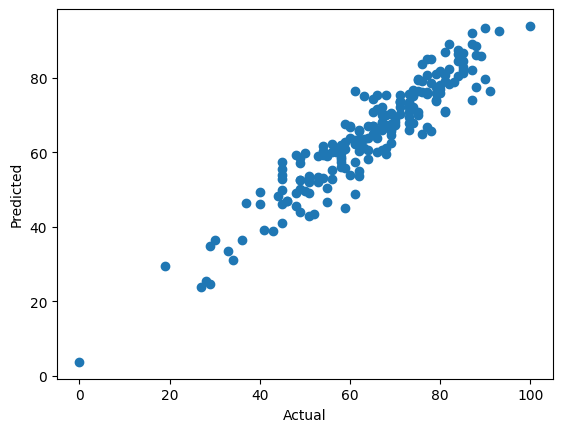

In [47]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

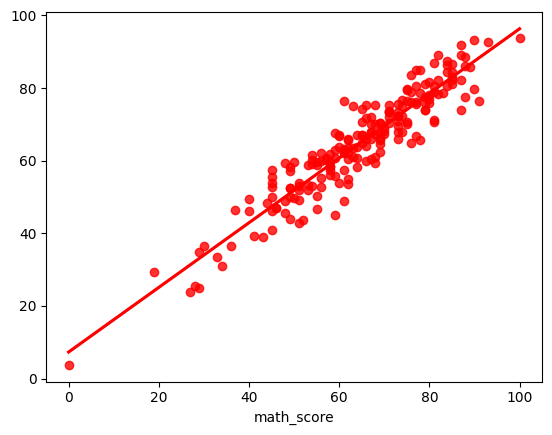

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

#### Difference between Actual and Predicted Values

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
